# Executive Report - Kyle Lombardo

## Part I: Research Question

With the recent uptick in hospital readmissions due to the addition of COPD and Hip & Knee measurement and historical trends, there is a need to understand why there has been an historically high number of readmissions in the hospital system. This executive report builds off the previous reports and will attempt to answer the queston of whether there are certain demographics, locales, pre-existing conditions, or other variables that will result in a higher likelihood of readmission.

The previous report showed that there was a statistical relationship between 'Population', 'Children', 'Initial_days', and 'TotalCharge' with 'ReAdmis' when compared using a t-test. These results were similar to the first report which found that there was a relationship between 'ReAdmis', 'TotalCharge', 'Initial_days', and 'VitD_levels' when analyzed using PCA. 

This report will focus on the logistic regression relationship of the variables and will attempt to perform a multiple logistic regression in order to predict 'ReAdmis', a categorical variable, with relative certainty. Due to 'ReAdmis' being a binomial categorical variable, a logistic regression will be used in order to predict whether a readmission to the hospital is likely given the explanatory variables. 

The data used for this report includes 10,000 patient record's responses to the following criteria from 'D207 D208 D209 Medical Data Consideration and Dictionary.pdf'. All strings that could not be re-expressed were removed as they would be impossible to use for logistic regression. In addition, redundant data such as 'Lat' and 'Lng' compared to 'Zip' or meaningless data such as 'Customer_id' were removed.

(Criteria marked with a * were removed for this report)


Criteria | Data Type | Example | Description
----- | ----- | ----- | -----
*Case Order | Integer | 1034 | Index Values
*Customer_id	|String |‘D550524’|	Unique identifier for patient
*Interaction |	String|	‘8cd49b13-f45a-4b47-a2bd-173ffa932c2f’|	Unique Identifier for transaction, procedure, and admission
*UID	|String|	‘3a83ddb66e2ae73798bdf1d705dc0932’	|Unique Identifier for transaction, procedure, and admission
*City	|String	|‘Braggs’	|Patient city address from billing
*State	|String|	‘AL’|	Patient state address from billing
*County	|String|	‘Morgan’|	Patient county address from billing
Zip	|Integer|	35621	|Patient zip address from billing
*Lat	|Float	|-86.5404	|Patient latitude address from billing
*Lng	|Float	|-81.1272	|Patient longitude address from billing
Population	|Integer|	281	|Patient city address population from billing
Area	|String	|‘Urban’|	Patient address from billing zoning type
*Timezone|	String|	‘America/New_York’|	Patient address from billing time zone locale
*Job	|String	|‘Actuary’	|Patient or primary insurance holder’s occupation 
Children|	Integer|	2|	Number of children in patient’s household
Age	|Integer|	53	|Patient’s age
Income|	Float|	88126.93|	Patient or primary insurance holder’s yearly income
Marital|	String|	‘Married’|	Patient’s marital status
Gender	|String|	‘Female’	|Patient’s self-identification of gender
ReAdmis	|String	|‘Yes’	|Whether patient has been readmitted within a month of last release
VitD_level|	Float|	47.81348|	Patient’s vitamin d level (ng/mL)
Doc_visits|	Integer|	5	|Number of visits by primary physician during initial hospitalization
Full_meals_eaten|	Integer	|1|	Number of full meals the patient ate while in hospital.
VitD_supp|	Integer|	2	|Number of times vitamin d supplement was ministered to patient
Soft_drink	|String|	‘Yes’|	Whether patient consumes >= 3 soft drinks in a day
Initial_admin	|String	|‘Observation Admission’	|Means by which patient was admitted to hospital initially
HighBlood	|String	|‘Yes’	|Whether patient has high blood pressure
Stroke	|String|	‘No’	|Whether patient has had a stroke
Complication_risk|	String	|‘High’	|Complication risk level as determined by primary physician
Overweight|	String	|‘Yes’	|Whether patient is considered obese considering his or her demographics
Arthritis|	String	|‘No’|	Whether patient has arthritis
Diabetes	|String	|‘Yes’|	Whether patient has diabetes
Hyperlipidemia	|String|	‘No’|	Whether patient has hyperlipidemia
BackPain	|String	|‘Yes’|	Whether patient has chronic back pain
Anxiety	|String	|‘Yes’	|Whether patient has anxiety
Allergic_rhinitis	|String	|‘No’|	Whether patient has allergic rhinitis
Reflux_esophagitis	|String	|‘Yes’|	Whether patient has reflux esophagitis
Asthma	|String|	‘No’|	Whether patient has asthma
Services	|String|	‘CT Scan’	|Primary service patient received from hospital
Initial_days|	Float	|7.302395	|Number of days patient stayed in hospital on initial visit
TotalCharge	|Float	|2631.702|	Average amount charged to patient daily 
Additional_charges|	Float|	14382.23|	Average amount for miscellaneous procedures, treatments, medicines, etc

Patient’s opinion survey on rate of importance (1 = most important, 8 = least important)

Criteria | Data Type | Example | Description
----- | ----- | ----- | -----
Item1 |Integer| 3| Timely admission
Item2	|Integer|2|	Timely treatment
Item3	|Integer|5|	Timely visits
Item4	|Integer|6|	Reliability
Item5	|Integer|1|	Options
Item6	|Integer|2|	Hours of treatment
Item7	|Integer|6|	Courteous staff
Item8	|Integer|4|	Evidence of active listening from doctor

## Part II: Method Justification

Multiple logistic regression is a useful machine learning tool used to predict a categorical target variable using multiple predictor variables of any numeric data type in a data set. All data fed into the regression as predictors must be cleaned with no missing data (NaN) and re-expressed as numeric variables (no strings). 

There are a number of assumptions that need to be addressed before logistic regression can be considered.<sup>1</sup> 
<ol>
    <li>The target variable must be binary. In this case 'ReAdmis' only has two unique values, 'yes' and 'no.'</li>
    <li> When running a high number of predictors, it is important to look for multicollinearity in the statistical analysis. Multicollinearity is when two or more predictor variables are along the same regression line and are thus providing the same information unnecessarily. This will be addressed as the report continues. </li>
    <li>There are no extreme outliers. This has already been checked in a previous report and will not be readressed here. Suffice it to say, there are no extreme outliers in this data set.</li>
    <li>There must a high number of entries. With 10,000 entries in the data set, this is sufficiently high.</li>
    <li>Lastly, there should be linear relationship between the target and feature variables. This is another point that will need to be observe as the report continues.</li>
</ol>

In this report Python programming language will be used. While R could possibly provide better statistical analysis of the logistic regressions used, Statsmodel will adequately show the best avenues and criteria needed to reduce dimensionality and variables to fine tune the regression for optimal predictability. Having a basis in python will help in making a future report on machine learning much easier as python excells in machine learning.

The following libraries are necessary in order to perform the data cleaning, exploratory data analysis, and modeling steps. More will be added for the modeling later.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

raw_data = pd.read_csv('medical_clean.csv')

Pandas and numpy are crucial tools for importing and manipulating the data. The data set 'df' is imported here using pandas. Matplotlib and Seaborn are useful for data visualizations. Statsmodels is wonderful for statistically viewing the regression model in order to assess how well the model is performing under the hood. The other advantage to Statsmodels is the `summary()` function that will be addressed later. 

Multiple logistic regression is quick, supervised learning technique crucial for better understanding the data and the relationships contained in the data set. While simple logistic regression might have been adequate for this particular task, most things in life are not explained due to one simple variable. The real world is messy and many things contribute to an effect in a cause and effect relationship. It is not different in a real world hospital setting. There can be many factors that constribute to whether a patient may be readmitted to the hospital. How many days they are in the hospital, what sort of condition they may be in when entering the hospital, where they are located, etc. Multiple logistic regression should not only predict the target variable well, but should predict new information as well.  

## Part III: Data Preparation

As stated above, the data must be in the correct format and data types in order to be run properly in multiple logistic regression. The data set will need to undergo a data cleaning step as follows: 

First, all variables not being used will be removed from the data set. Second, all categorical string data must be re-expressed as numeric values. Lastly, any missing values must be imputed using either an average or assigned a value if necessary. 

### Removing unnecessary and redundant data

In [2]:
df = raw_data.drop(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', \
                    'County', 'Lat', 'Lng', 'TimeZone','Job'], axis=1)

### Re-expressing data to numeric data types and missing values

To understand what data types of each of the variables that need to be re-expressed and to get a count on how many missing values are in the data set, `df.info()` can be used.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Zip                 10000 non-null  int64  
 1   Population          10000 non-null  int64  
 2   Area                10000 non-null  object 
 3   Children            10000 non-null  int64  
 4   Age                 10000 non-null  int64  
 5   Income              10000 non-null  float64
 6   Marital             10000 non-null  object 
 7   Gender              10000 non-null  object 
 8   ReAdmis             10000 non-null  object 
 9   VitD_levels         10000 non-null  float64
 10  Doc_visits          10000 non-null  int64  
 11  Full_meals_eaten    10000 non-null  int64  
 12  vitD_supp           10000 non-null  int64  
 13  Soft_drink          10000 non-null  object 
 14  Initial_admin       10000 non-null  object 
 15  HighBlood           10000 non-null  object 
 16  Strok

There appears to be a good number of variables that need to be re-expressed as numeric values. It also show that this data set has no missing values therefore imputation will not be necessary. 

Using `df.column.unique()` the unique values in each column can be identified and replaced below with numeric values.

In [4]:
df.Marital.unique()

array(['Divorced', 'Married', 'Widowed', 'Never Married', 'Separated'],
      dtype=object)

In [5]:
df.ReAdmis.replace(('Yes', 'No'), (1,0), inplace=True)
df.Soft_drink.replace(('Yes', 'No'), (1,0), inplace=True)
df.HighBlood.replace(('Yes', 'No'), (1,0), inplace=True)
df.Stroke.replace(('Yes', 'No'), (1,0), inplace=True)
df.Overweight.replace(('Yes', 'No'), (1,0), inplace=True)
df.Arthritis.replace(('Yes', 'No'), (1,0), inplace=True)
df.Diabetes.replace(('Yes', 'No'), (1,0), inplace=True)
df.Hyperlipidemia.replace(('Yes', 'No'), (1,0), inplace=True)
df.BackPain.replace(('Yes', 'No'), (1,0), inplace=True)
df.Anxiety.replace(('Yes', 'No'), (1,0), inplace=True)
df.Allergic_rhinitis.replace(('Yes', 'No'), (1,0), inplace=True)
df.Reflux_esophagitis.replace(('Yes', 'No'), (1,0), inplace=True)
df.Asthma.replace(('Yes', 'No'), (1,0), inplace=True)

df.Area.replace(('Rural', 'Suburban', 'Urban'), (2,1,0), inplace=True)
df.Gender.replace(('Male', 'Female', 'Nonbinary'), (2,1,0), inplace=True)
df.Complication_risk.replace(('High', 'Medium', 'Low'), (2,1,0), inplace=True)
df.Initial_admin.replace(('Emergency Admission', 'Elective Admission', 'Observation Admission'), (2,1,0), inplace=True)
df.Services.replace(('Blood Work', 'Intravenous', 'CT Scan', 'MRI'), (3,2,1,0), inplace=True)
df.Marital.replace(('Never Married', 'Married', 'Separated', 'Divorced', 'Widowed'), (4,3,2,1,0), inplace=True)

Finally, using the final numeric data the mean and variance can be calculated using `df.describe()`

In [6]:
df.describe()

,Zip,Population,Area,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,50159.323900,9965.253800,1.006600,2.097200,53.511700,40490.495160,1.994000,1.455400,0.366900,17.964262,...,5312.172769,12934.528587,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,27469.588208,14824.758614,0.816837,2.163659,20.638538,28521.153293,1.417803,0.539296,0.481983,2.017231,...,2180.393838,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,610.000000,0.000000,0.000000,0.000000,18.000000,154.080000,0.000000,0.000000,0.000000,9.806483,...,1938.312067,3125.703000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27592.000000,694.750000,0.000000,0.000000,36.000000,19598.775000,1.000000,1.000000,0.000000,16.626439,...,3179.374015,7986.487755,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,50207.000000,2769.000000,1.000000,1.000000,53.000000,33768.420000,2.000000,1.000000,0.000000,17.951122,...,5213.952000,11573.977735,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,72411.750000,13945.000000,2.000000,3.000000,71.000000,54296.402500,3.000000,2.000000,1.000000,19.347963,...,7459.699750,15626.490000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,99929.000000,122814.000000,2.000000,10.000000,89.000000,207249.100000,4.000000,2.000000,1.000000,26.394449,...,9180.728000,30566.070000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


With the data set now cleaned and re-expressed, it is time to assign target and predictor variables as y and X and to analyze each variable's univariate distributions using histograms.

In [7]:
y = df['ReAdmis']
X = df.drop(['ReAdmis'], axis=1)

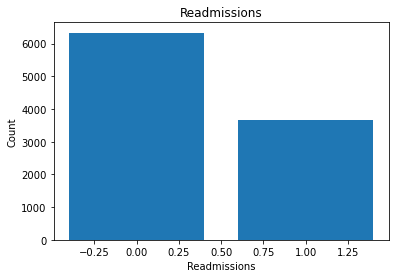

In [8]:
plt.bar(df['ReAdmis'].unique(), df['ReAdmis'].value_counts())
plt.xlabel('Readmissions')
plt.ylabel('Count')
plt.title('Readmissions')
plt.show()

In [9]:
df['ReAdmis'].value_counts()

0    6331
1    3669
Name: ReAdmis, dtype: int64

array([[<AxesSubplot:title={'center':'Zip'}>,
        <AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'Area'}>,
        <AxesSubplot:title={'center':'Children'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Income'}>],
       [<AxesSubplot:title={'center':'Marital'}>,
        <AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'VitD_levels'}>,
        <AxesSubplot:title={'center':'Doc_visits'}>,
        <AxesSubplot:title={'center':'Full_meals_eaten'}>,
        <AxesSubplot:title={'center':'vitD_supp'}>],
       [<AxesSubplot:title={'center':'Soft_drink'}>,
        <AxesSubplot:title={'center':'Initial_admin'}>,
        <AxesSubplot:title={'center':'HighBlood'}>,
        <AxesSubplot:title={'center':'Stroke'}>,
        <AxesSubplot:title={'center':'Complication_risk'}>,
        <AxesSubplot:title={'center':'Overweight'}>],
       [<AxesSubplot:title={'center':'Arthritis'}>,
        <Axes

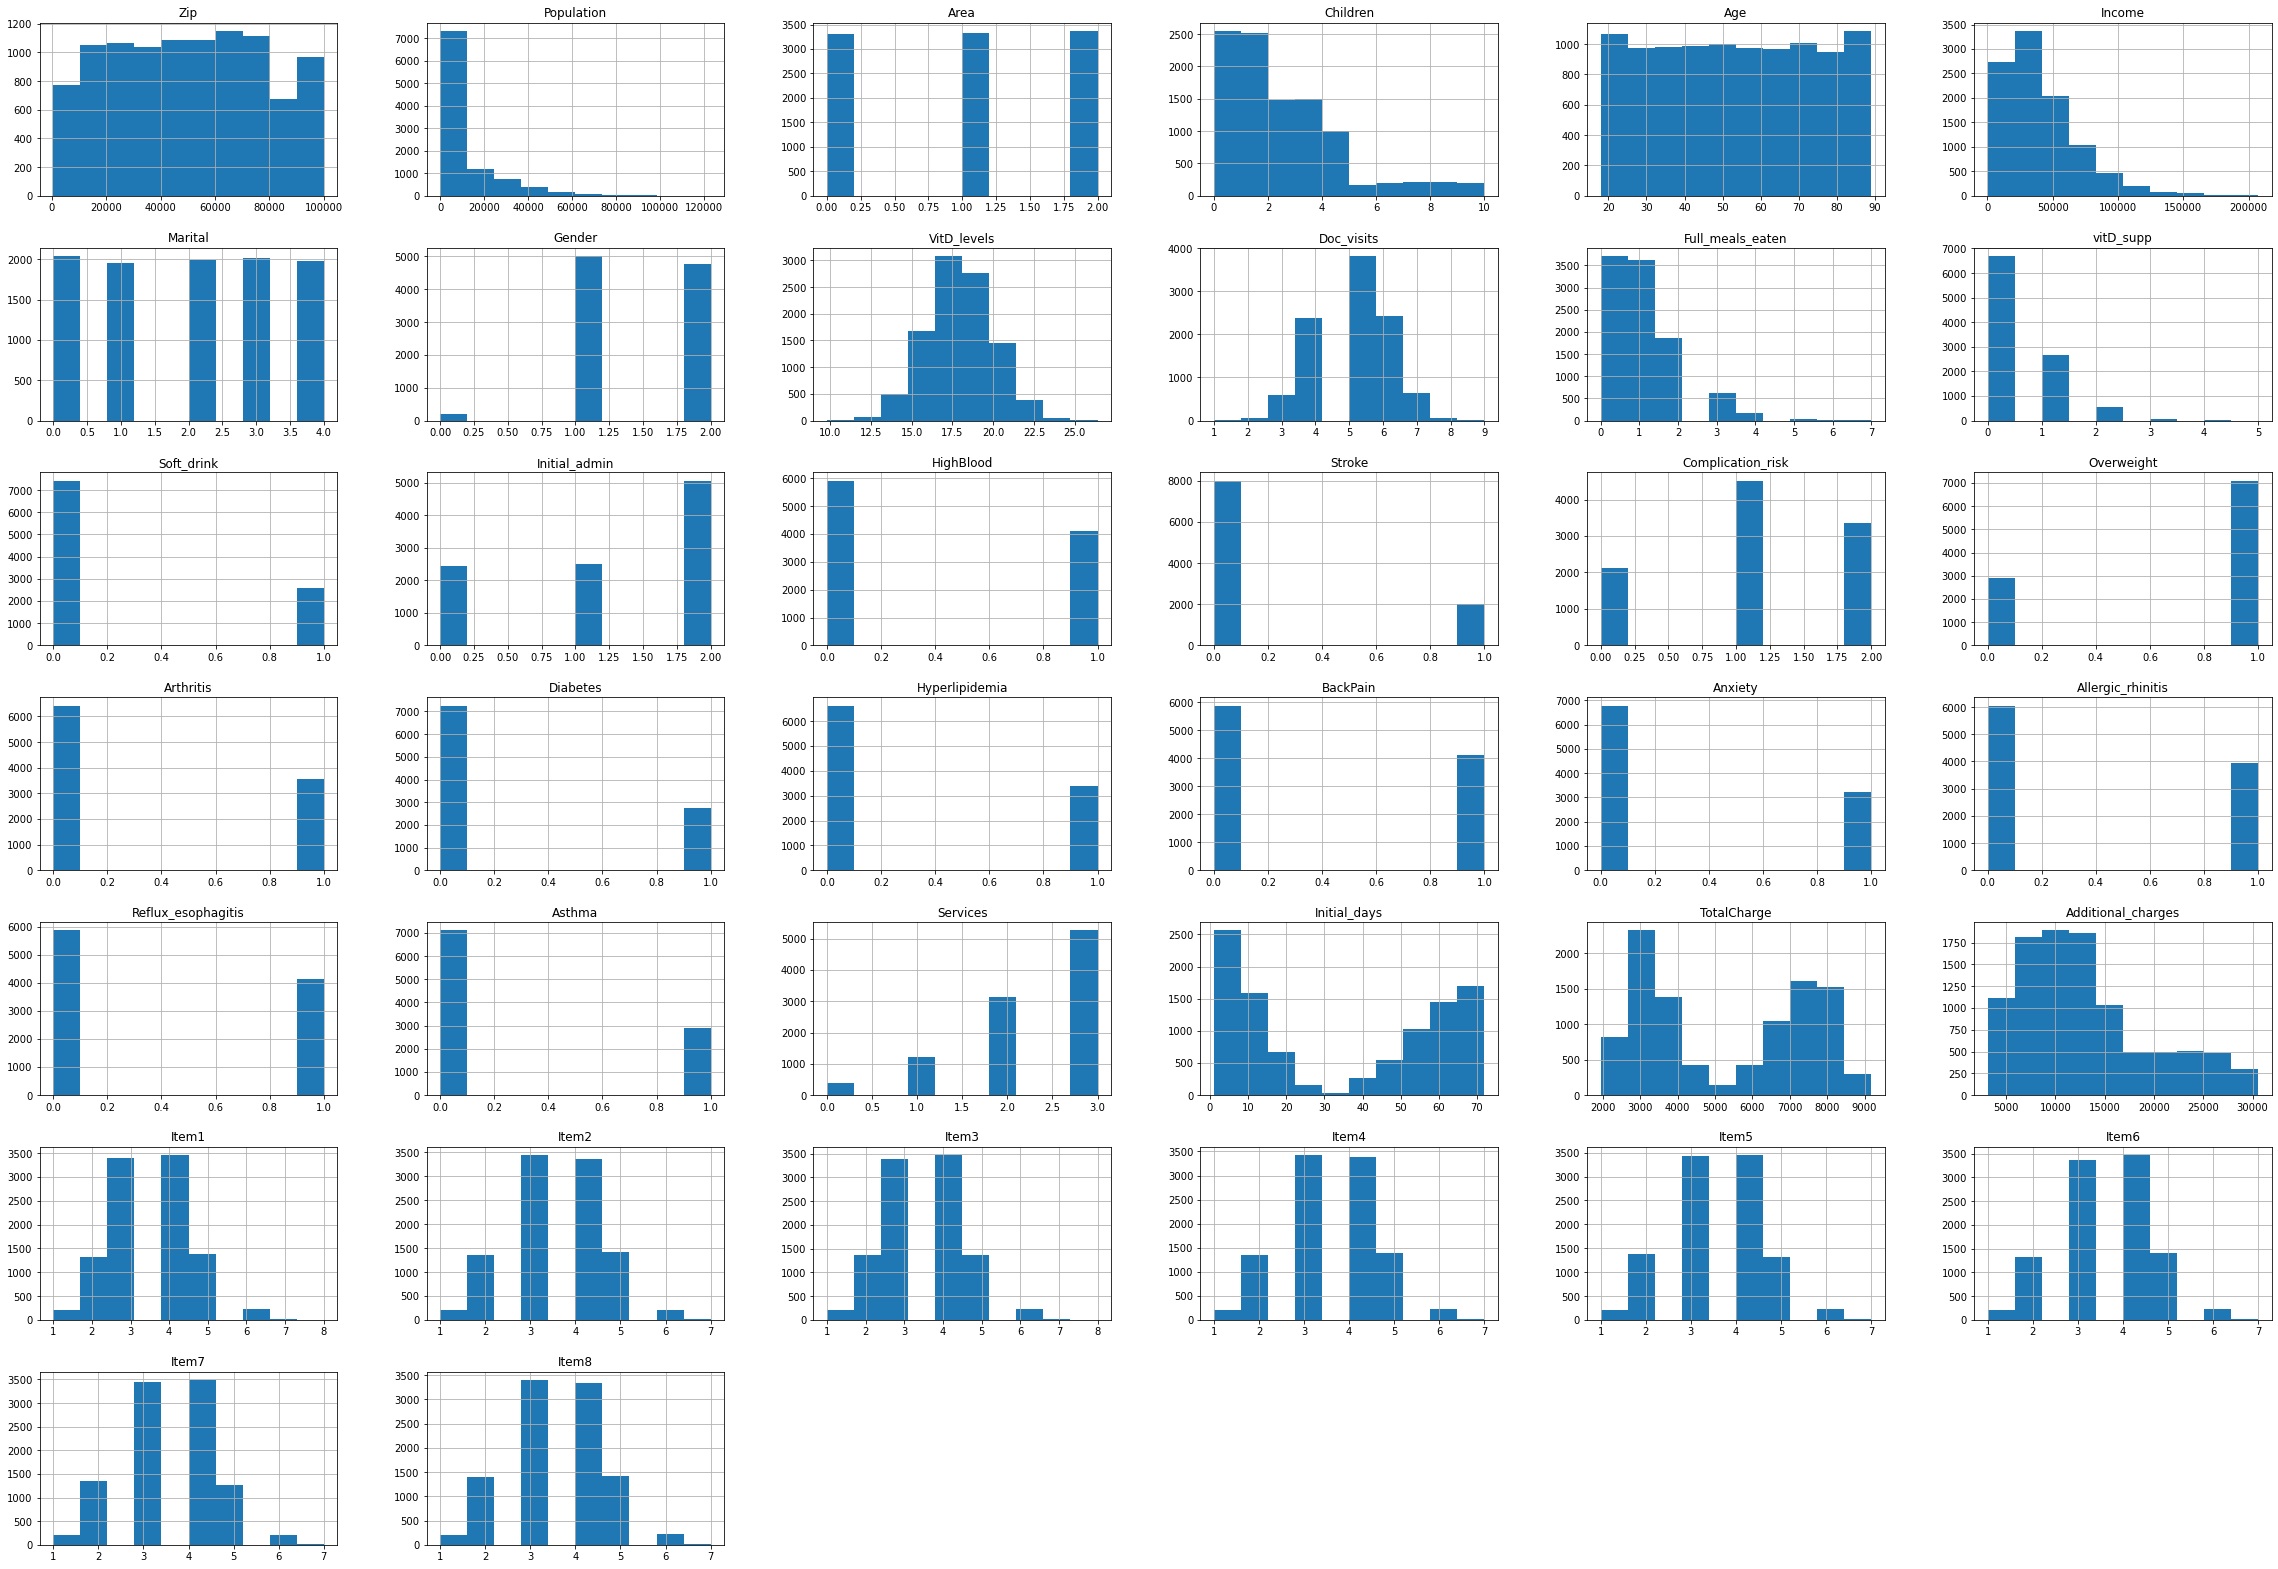

In [10]:
X.hist(figsize=(40,28))

It is also wise to analyze the bivariate distribution between all the predictor variables and the target. This is easily done with two function that loops through each predictor variable and plots a scatterplot with each predictor variable vs the target variable. These functions are split to compare the categorical 'ReAdmis' variable with continuous variables and other categorical variables.

In [11]:
def comp_scatter(df, x, y):
    for i in x:
      plt.scatter(df[i],y)
      plt.xlabel(i)
      plt.ylabel('Readmissions')
      plt.title('Readmissions vs {}'.format(i))
      plt.show()
    
def comp_bar(df, x, y):
    for i in x:
      fig = plt.figure()
      ax = fig.add_axes([0,0,1,1])
      ax.bar(df[i].unique(), df[i].value_counts(), color='b', width=0.25, label=i)
      ax.bar(y.unique()+0.25, y.value_counts(), color='g', width=0.25, label='Readmissions')
      plt.ylabel('Count')
      plt.title('Readmissions vs {}'.format(i))
      ax.legend()
      plt.show()
        
def comp_freq(df, x, y):
    for i in x:
      print(pd.crosstab(index=df[i], columns=y))
    
#       fig = plt.figure()
#       ax = fig.add_axes([0,0,1,1])
#       ax.bar(df[i].unique(), df[i].value_counts(), color='b', width=0.25, label=i)
#       ax.bar(y.unique()+0.25, y.value_counts(), color='g', width=0.25, label='Readmissions')
#       plt.ylabel('Count')
#       plt.title('Readmissions vs {}'.format(i))
#       ax.legend()
#       plt.show()

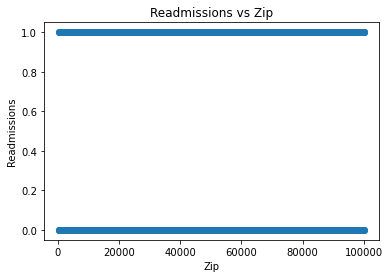

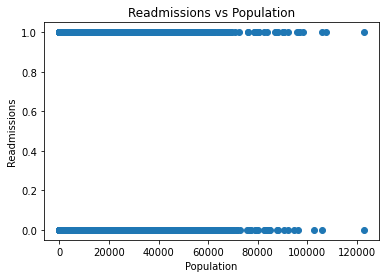

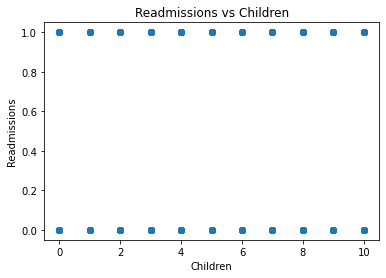

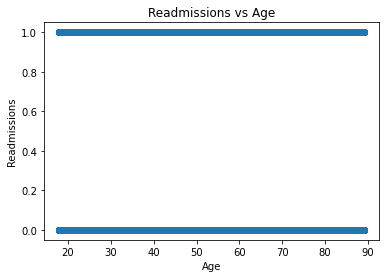

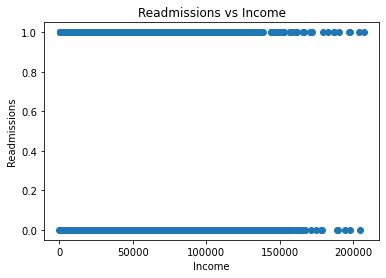

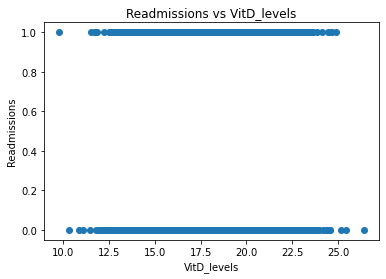

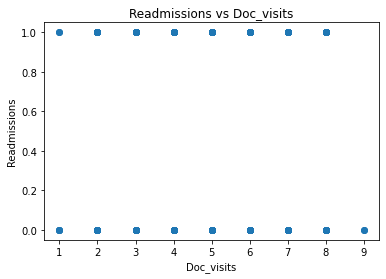

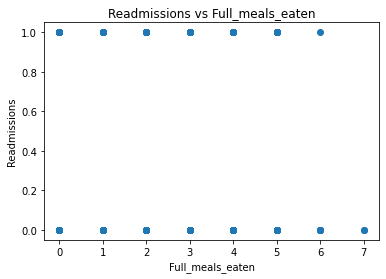

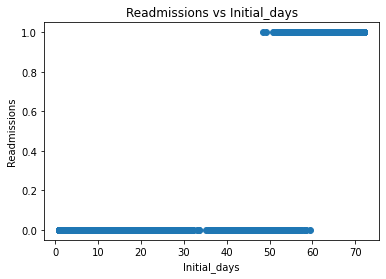

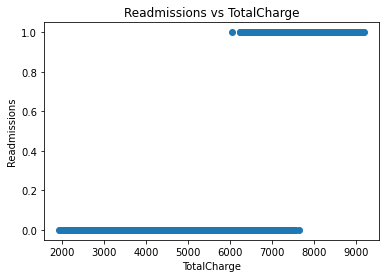

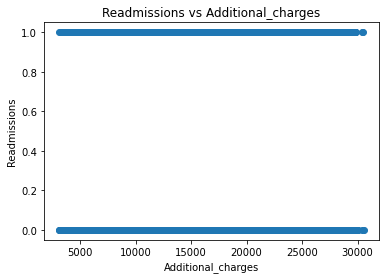

In [12]:
numeric_vars = ['Zip', 'Population', 'Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten',
                'Initial_days','TotalCharge', 'Additional_charges']
comp_scatter(df, numeric_vars, df['ReAdmis'])

In [13]:
cat_vars = pd.DataFrame({'Area': X['Area'], 'Marital': X['Marital'], 'Gender': X['Gender'], 'vitD_supp': X['vitD_supp'], 
                        'Soft_drink': X['Soft_drink'], 'Initial_admin': X['Initial_admin'], 'HighBlood': X['HighBlood'], 
                        'Stroke': X['Stroke'], 'Complication_risk': X['Complication_risk'], 'Overweight': X['Overweight'], 
                        'Arthritis': X['Arthritis'],'Diabetes': X['Diabetes'], 'Hyperlipidemia': X['Hyperlipidemia'], 
                        'BackPain': X['BackPain'],'Anxiety': X['Anxiety'], 'Allergic_rhinitis': X['Allergic_rhinitis'], 
                        'Reflux_esophagitis': X['Reflux_esophagitis'],'Asthma': X['Asthma'], 'Services': X['Services'],
                        'Item1': X['Item1'], 'Item2': X['Item2'], 'Item3': X['Item3'], 'Item4': X['Item4'], 
                        'Item5': X['Item5'], 'Item6': X['Item6'], 'Item7': X['Item7'], 'Item8': X['Item8']})

comp_freq(df, cat_vars, y)

ReAdmis     0     1
Area               
0        2075  1228
1        2106  1222
2        2150  1219
ReAdmis     0    1
Marital           
0        1278  767
1        1283  678
2        1259  728
3        1268  755
4        1243  741
ReAdmis     0     1
Gender             
0         131    83
1        3205  1813
2        2995  1773
ReAdmis       0     1
vitD_supp            
0          4282  2420
1          1668  1016
2           325   219
3            51    13
4             4     1
5             1     0
ReAdmis        0     1
Soft_drink            
0           4717  2708
1           1614   961
ReAdmis           0     1
Initial_admin            
0              1567   869
1              1608   896
2              3156  1904
ReAdmis       0     1
HighBlood            
0          3747  2163
1          2584  1506
ReAdmis     0     1
Stroke             
0        5071  2936
1        1260   733
ReAdmis               0     1
Complication_risk            
0                  1343   782
1          

Finally, for the last step in the data preparation stage, the cleaned and prepared dataset is exported for the final report.

In [14]:
df.to_csv(r'C:\Users\kylel\OneDrive\Desktop\Learning\School\D208 - Predictive Modeling\PA\prepared_data.csv')

## Part IV: Model Comparison and Analysis

With the data cleaned up, a logistic regression model can be found using the data set in order to predict 'ReAdmis'. First a few functions and libraries will need to be imported. The functions and libraries will be explained as used. 

#### Some Functions and Libraries For This Section

In [15]:
from sklearn import linear_model #
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from scipy import stats #
from scipy.special import expit
import statsmodels.api as sm

In [16]:
def auc(variables, target, df):
    X = df[variables]
    y = target
    logreg = sm.Logit(y,X).fit()
    predictions = round(logreg.predict(X))
    auc = roc_auc_score(y, predictions)
    return auc

def next_best(current_var, candidate_var, target, df):
    best_auc = -1
    best_variable = None
    for i in candidate_var:
        auc_v = auc(current_var + [i], target, df)
        if auc_v >= best_auc:
            best_auc = auc_v
            best_variable = i
    return best_variable

In [17]:
def cm_accuracy(cm):
    denom = sum(sum(cm))
    return((cm[0,0] + cm[1,1]) / denom)

In [18]:
def auc_levels(X, y, num):
    aucs = []
    for i in range(0,num):
        logreg = sm.Logit(y,X).fit()
        predictions = round(logreg.predict(X))
        auc = roc_auc_score(y, predictions)
        aucs.append(auc)
        X = X.drop(X.columns[[-1]], axis=1)
    return aucs

#### Model 1: all variables

First, a preliminary logistic regression will be run to see how well using all other variables in the data set will work. Because Statsmodels does not come with a constant, it will need to be added with `sm.add_constant()`. `test_train_split` is used to see how well the logistic regression works without using some of records in the data set. 40% of the records are set aside to be used as a test to see how well the model created with the other 60% performs. This is particularily advantageous for logistic regression when an ROC model is created later on.

With the patients split up into testing and training groups, the training group is used to create a logistic regression using the `sm.Logit` function from Statsmodels. As mentioned above, Statsmodels has the functionality that allows it to print off a `.summary()` of all the statistics outputted from the logistic model including the coefficients and probability of each predictor variable and data on the entire regression such as log-likelihood.

After the model is created, a `roc_auc_score` is found. This is simply the True Positive Rate vs False Positive Rate test to see how reliable the model is at finding the correct values. Finally, a `confusion_matrix`<sup>2</sup> is created as one final test to see yet again how well the model is predicting along with a user created function named `cm_accuracy` as an accuracy test which divides True Positives and Negatives by all sample predictions, to see if the model is accurate in its predictions.

In [19]:
# Perform train_test_split
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# Initialize, fit, and summarize logistic regression
logreg = sm.Logit(y_train, X_train).fit()
logreg.summary()

Optimization terminated successfully.
         Current function value: 0.034002
         Iterations 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                ReAdmis   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7961
Method:                           MLE   Df Model:                           38
Date:                Tue, 19 Oct 2021   Pseudo R-squ.:                  0.9483
Time:                        19:17:54   Log-Likelihood:                -272.02
converged:                       True   LL-Null:                       -5258.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -78.0408      5.096    -15.313      0.000     -88.029     -68.052
Zip                -8.985e-06   4.15e-06     -2.165      0.030   -1.71e-05   -8.51e-07
Population          9.804e-06   7.67e-06      1.279      0.201   -5.22e-06    2.48e-05
Area                  -0.1106      0.143     -0.776      0.438      -0.390       0.169
Children               0.0671      0.051      1.311      0.190      -0.033       0.167
Age                   -0.0050      0.016     -0.310      0.757      -0.037       0.027
Income             -5.197e-07   4.18e-06     -0.124      0.901   -8.72e-06    7.68e-06
Marital               -0.0235      0.081     -0.291      0.771      -0.182       0.135
Gender                 0.1772      0.210      0.842      0.400      -0.235       0.590
VitD_levels            0.0266      0.055      0.486      0.627      -0.081       0.134
Doc_visits             0.0495      0.109      0.453      0.650      -0.164       0.263
Full_meals_eaten       0.0236      0.115      0.205      0.838      -0.203       0.250
vitD_supp             -0.1073      0.178     -0.602      0.547      -0.457       0.242
Soft_drink             0.1045      0.264      0.396      0.692      -0.413       0.622
Initial_admin          0.4882      0.254      1.921      0.055      -0.010       0.986
HighBlood              0.5932      0.646      0.918      0.358      -0.673       1.859
Stroke                 1.7544      0.299      5.863      0.000       1.168       2.341
Complication_risk      0.3374      0.229      1.473      0.141      -0.112       0.786
Overweight            -0.1597      0.254     -0.630      0.529      -0.657       0.337
Arthritis             -1.2811      0.262     -4.884      0.000      -1.795      -0.767
Diabetes               0.2268      0.259      0.877      0.380      -0.280       0.734
Hyperlipidemia         0.3882      0.255      1.519      0.129      -0.113       0.889
BackPain               0.2751      0.241      1.141      0.254      -0.198       0.748
Anxiety               -1.1469      0.258     -4.443      0.000      -1.653      -0.641
Allergic_rhinitis     -0.7177      0.246     -2.922      0.003      -1.199      -0.236
Reflux_esophagitis    -0.3755      0.244     -1.540      0.124      -0.853       0.102
Asthma                -1.0694      0.252     -4.236      0.000      -1.564      -0.575
Services              -0.6354      0.134     -4.758      0.000      -0.897      -0.374
Initial_days           1.2558      0.100     12.552      0.000       1.060       1.452
TotalCharge            0.0016      0.001      2.147      0.032       0.000       0.003
Additional_charges  1.045e-05   6.91e-05      0.151      0.880      -0.000       0.000
Item1                  0.0771      0.164      0.470      0.639      -0.245       0.399
Item2                  0.3229      0.151      2.137      0.033       0.027       0.619
Item3                 -0.2912      0.140     -2.082      0.037      -0.565      -0.017
Item4                 

Looking at the coefficients, there are quite a few that are either too small to really make any difference or they have a high probability that does not contribute too much. For now, these will be left until the next step is complete.

In [20]:
#Create predictions and roc_auc scores
train_predicts = logreg.predict(X_train)
train_roc_auc = roc_auc_score(y_train, train_predicts)
test_predicts = logreg.predict(X_test)
test_roc_auc = roc_auc_score(y_test, test_predicts)

print('Stats Roc Auc Score for Train: {:.3f} Test: {:.3f}'.format(train_roc_auc, test_roc_auc))

Stats Roc Auc Score for Train: 0.999 Test: 0.999


In [21]:
#Create a confusion matrix
cm = confusion_matrix(y_test, round(test_predicts))
cm

array([[1246,   20],
       [  24,  710]], dtype=int64)

In [22]:
#Calculate accuracy
print('Accuracy: {}'.format(cm_accuracy(cm))) 

Accuracy: 0.978


While these are very good Roc Auc and accuracy scores, Roc Auc is notorious for having higher values when there are more predictor variables. To find the best roc auc score, some of the predictor variables will need to be removed. This is best done with forward stepwise selection which will be performed in the next section.

#### Model 2: Forward Stepwise selection

Forward stepwise selection is a iterative method for finding the best predictor variables by roc suc score. All X variables are placed into a list and fed into the algorithm which takes the desired number of variables, in this case 10 was selected as a starting point. Roc Auc scores are found for each variable and the variable with best score, or score closest to 1, is singled out. Then the algorithm repeats finding the variable that when combined with the first variable provides the best roc auc score. This process is repeated until the 10 best predictors are found.<sup>3</sup>

In [23]:
candidate_var = ['Zip', 'Population', 'Area', 'Children', 'Age', 'Income', 'Marital',
       'Gender', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4',
       'Item5', 'Item6', 'Item7', 'Item8']
current_var = []
auc_vals = []
target = y
max_num_variables = 10
number_iterations = min(max_num_variables, len(candidate_var))
for i in range(0, number_iterations):
    next_var = next_best(current_var, candidate_var, target, X)
    current_var = current_var + [next_var]
    candidate_var.remove(next_var)
print(current_var)

Optimization terminated successfully.
         Current function value: 0.666347
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.684150
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.670359
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.678547
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.663212
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.667347
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.670090
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.662156
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.657835
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.658746
  

Optimization terminated successfully.
         Current function value: 0.259644
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.259417
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.261658
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.219457
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.170833
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.245181
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.232087
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.231672
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.226693
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.228051
  

Optimization terminated successfully.
         Current function value: 0.124823
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.124742
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.124877
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.117060
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.124710
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.124805
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.122457
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.124311
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.124398
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.104117
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.103742
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.104109
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.103362
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.103778
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.103749
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.103065
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.104099
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.103972
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

These 10 variables will now be used as the predictor set `new_X`. Yet again, the constant will need to be added and these new variables will need to be run with `train_test_split`.  

In [24]:
new_X = [X['Item8'], X['Initial_days'], X['VitD_levels'], X['TotalCharge'], X['Item5'], 
        X['Initial_admin'], X['Complication_risk'], X['Doc_visits'], X['Item3'], X['Item7']]
new_X = pd.DataFrame(new_X).T

In [30]:
# New train_test_split
new_X = sm.add_constant(new_X)
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_X, y, test_size=0.2, random_state=2, stratify=y)

#New logit model
new_model = sm.Logit(new_y_train,new_X_train).fit()
new_model.summary()

Optimization terminated successfully.
         Current function value: 0.042935
         Iterations 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                ReAdmis   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7989
Method:                           MLE   Df Model:                           10
Date:                Tue, 19 Oct 2021   Pseudo R-squ.:                  0.9347
Time:                        19:18:13   Log-Likelihood:                -343.48
converged:                       True   LL-Null:                       -5258.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -63.8497      3.800    -16.801      0.000     -71.298     -56.401
Item8                -0.1011      0.100     -1.015      0.310      -0.296       0.094
Initial_days          1.0299      0.072     14.403      0.000       0.890       1.170
VitD_levels           0.0130      0.047      0.274      0.784      -0.080       0.106
TotalCharge           0.0010      0.001      1.939      0.053   -1.13e-05       0.002
Item5                -0.0606      0.101     -0.600      0.549      -0.259       0.138
Initial_admin         0.4929      0.195      2.523      0.012       0.110       0.876
Complication_risk     0.3810      0.179      2.124      0.034       0.029       0.733
Doc_visits            0.0117      0.090      0.130      0.896      -0.165       0.188
Item3                -0.0804      0.104     -0.775      0.439      -0.284       0.123
Item7                 0.0642      0.104      0.617      0.537      -0.140       0.268
=====================================================================================

Possibly complete quasi-separation: A fraction 0.76 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [31]:
new_train_predicts = new_model.predict(new_X_train)
new_train_roc_auc = roc_auc_score(new_y_train, new_train_predicts)

new_test_predicts = new_model.predict(new_X_test)
new_test_roc_auc = roc_auc_score(new_y_test, new_test_predicts)

print('Roc Auc Score for Train: {:.3f} Test: {:.3f}'.format(new_train_roc_auc, new_test_roc_auc))

Roc Auc Score for Train: 0.999 Test: 0.998


In [32]:
new_cm = confusion_matrix(new_y_test, round(new_test_predicts))
cm_accuracy(new_cm)

0.9775

The roc auc and accuracy scores returned a smidge lower this time around. With multicollinearity reduced it should be no surprise that the roc auc score is lower and should be improved. However, this is not certain.

In order to find the features in the data set, the `auc_levels` will be used to track what those auc roc scores were after each iteration used above but this time it is only using the new_X_test values. When a prediction variables is used that does not help contribute to the accuracy of the model, the `roc_auc_score` will start treading down where the new_X_train would only increase. This is another wonderful use for the `train_test_split` method.

In [33]:
auc_test = auc_levels(new_X_test, new_y_test, 11)
auc_table = pd.DataFrame({'Predictor Vars': new_X.columns,
                          'Auc Values': auc_test})
auc_table

Optimization terminated successfully.
         Current function value: 0.049953
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.050044
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.050290
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.050296
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.050875
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.050896
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.051432
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.053210
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.053568
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.

,Predictor Vars,Auc Values
0,const,0.975930
1,Item8,0.977401
2,Initial_days,0.976216
3,VitD_levels,0.976216
4,TotalCharge,0.976325
5,Item5,0.975930
6,Initial_admin,0.976720
7,Complication_risk,0.975644
8,Doc_visits,0.974567
9,Item3,0.500000


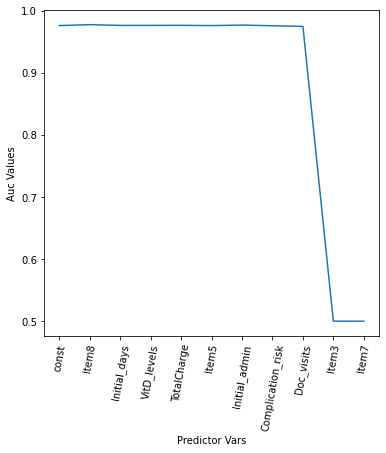

In [34]:
plt.figure(figsize=(6,6))
ax = sns.lineplot(x='Predictor Vars', y='Auc Values', data=auc_table)
plt.xticks(rotation=80)
plt.show()

From the plot above, there is a relatively flat line for the first 8 variables before it falls off a cliff. While it may be wise to use all of them, it wouldn't be necessary. Following Occam's razor, additional variables which do not add anything to the model are best avoided. Simplier is always better. Therefore, the final model will only use the 'const', 'Item8' and 'Initial_days' variables as features. 'VitD_levels' gives the same auc value as 'Initial_days' as well as having a large P-value. 

#### Model 3: Final Model

Time to see if the variable reductions completed has improved the predictability of the logistic regression model. First, the features variable `final_X` needs to be reduced to the two predictor variables and the constant as outlined above. Then the model will use `train_test_split` yet again and provide a summary. `roc_auc_score` will need to be tested on both the training and testing data. A confusion matrix will be calculated using `confusion_matrix`. Finally, the user-created function, `cm_accuracy` (or confusion matrix accuracy) will be calculated.

In [35]:
final_X = new_X.iloc[:,:3]
final_X = sm.add_constant(final_X)

In [36]:
final_X_train, final_X_test, final_y_train, final_y_test = train_test_split(final_X, y, test_size=0.2, random_state=40, stratify=y)

final_model = sm.Logit(final_y_train, final_X_train).fit()
final_model.summary()

Optimization terminated successfully.
         Current function value: 0.048268
         Iterations 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                ReAdmis   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7997
Method:                           MLE   Df Model:                            2
Date:                Tue, 19 Oct 2021   Pseudo R-squ.:                  0.9266
Time:                        19:18:23   Log-Likelihood:                -386.14
converged:                       True   LL-Null:                       -5258.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -54.7968      2.822    -19.415      0.000     -60.329     -49.265
Item8           -0.1332      0.090     -1.473      0.141      -0.310       0.044
Initial_days     1.0171      0.052     19.601      0.000       0.915       1.119
================================================================================

Possibly complete quasi-separation: A fraction 0.74 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [37]:
final_train_predicts = final_model.predict(final_X_train)
final_train_roc_auc = roc_auc_score(final_y_train, final_train_predicts)

final_test_predicts = final_model.predict(final_X_test)
final_test_roc_auc = roc_auc_score(final_y_test, final_test_predicts)

print('Train: {:.3f} Test: {:.3f}'.format(final_train_roc_auc, final_test_roc_auc))

Train: 0.998 Test: 0.998


In [38]:
final_cm = confusion_matrix(final_y_test, round(final_test_predicts))
final_cm

array([[1241,   25],
       [  25,  709]], dtype=int64)

In [39]:
cm_accuracy(final_cm)

0.975

These are some of the best values yet. Not only is the logistic regression optimized for a high accuracy, but the limited number of variables helps ensure that multicollinearity shouldn't be playing any role. Looking at the 'Item8 variable in the summary, it does have a high P-value, but the accuracy and roc auc score is very acceptable. For now, this seems to be a good place to stop.

It is also important to visualize the regression in a number of different ways. Although this regression model only has two variables and could be seen visually, it is easiest to plot the regression for each feature variable separately. Below are plotted the test sets and the predictions the model has made. 

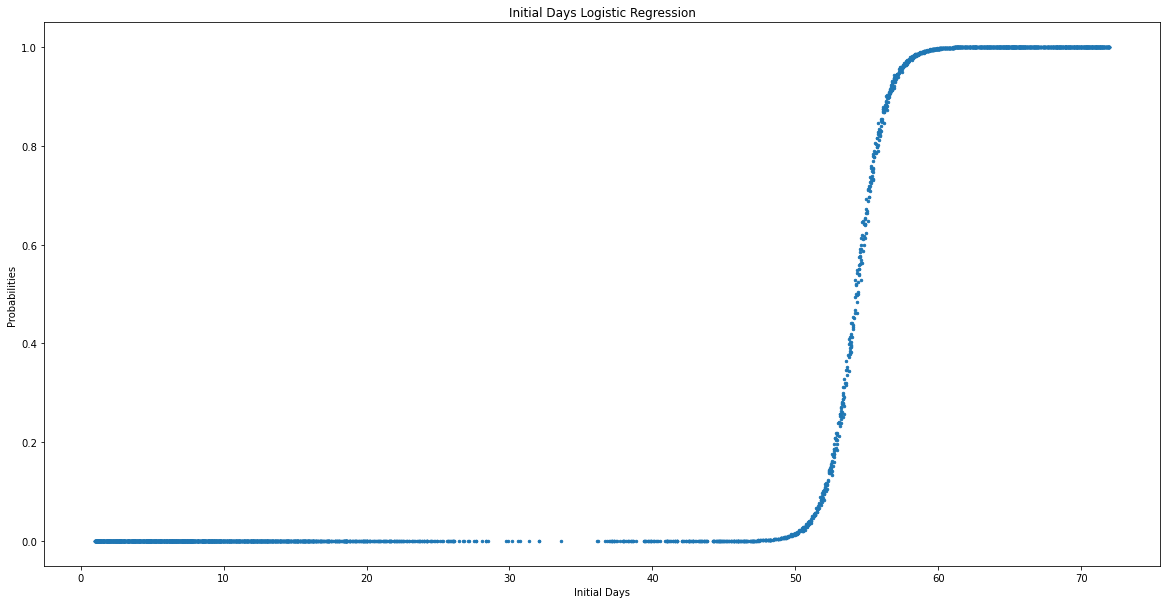

In [201]:
dims = (20,10)
plt.figure(figsize=dims)
plt.scatter(x=final_X_test['Initial_days'], y=final_test_predicts, s=6)
plt.xlabel('Initial Days')
plt.ylabel('Probabilities')
plt.title('Initial Days Logistic Regression')
plt.show()

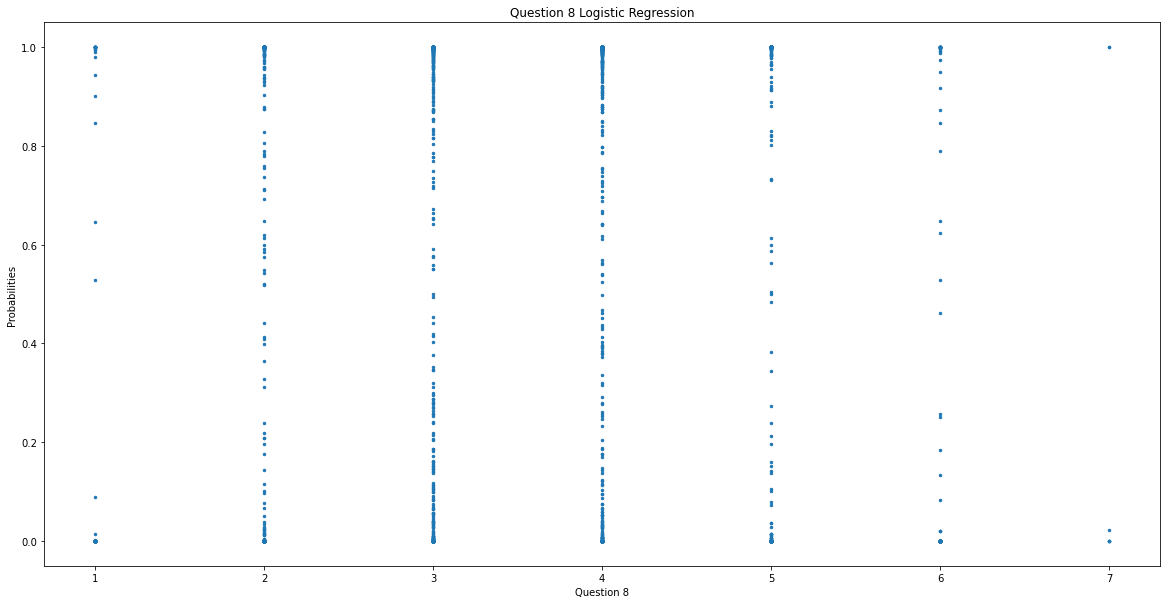

In [202]:
plt.figure(figsize=dims)
plt.scatter(x=final_X_test['Item8'], y=final_test_predicts, s=6)
plt.xlabel('Question 8')
plt.ylabel('Probabilities')
plt.title('Question 8 Logistic Regression')
plt.show()

These two plots show the predicted values for each of the remaining predictor variables. While 'Item8' is hard to read using a scatter plot, 'Initial_days' tells a very obvious story of what values for 'Initial_days' are needed to accurately predict if a patient would be readmitted or not. 

Looking back at the bivariate plot between 'ReAdmis' and 'Initial_days' there is an obvious overlap between the 1 and 0 between 50 and 60 'Initial_days'. This corresponds perfectly with what is seen in the plot. Now the logistic regression can better predict those middle values within the 50 to 60 range with 'Item8' and the intercept providing the rest of the support needed to make the best predictions possible.

## Part V: Data Summary and Implications

The above summaries and plots showed that the logistic regression model created can accurately predict whether a patient is likely to be readmitted or not. The two most prevalent predictors are both their initial days and how well the patients listened to their doctor, or item 8 in the survey. As the number of the days are in the hospital are higher, they are likely to come back especially if they are there for over 50 days. As for the listening, the lower the score they received for listening to their doctor, the more likely they were to be readmitted. This could possibly be the case of a patient not following the instructions from the doctor and needing to be readmitted due to negligence or the like.  

The y-intercept, or listening intently to the doctor and no time in the hospital, has an intercept of -53.01. Then as the number of days goes up, the likelyhood of a readmission goes up by a coefficient of 0.98. As mentioned above, if the patient is not listening intently to their doctor, the likelyhood of being readmitted rises by 0.076.

The predictive power of the logistic regression does change slightly when reducing the number of variables, but not significantly enough to be able to say which is better. In theory the multicollinearity should be better with the final model and that is the one likely to be the best. Either way, this data set in general does an exceptional job at being able to predict the readmission rate. The roc auc scores and accuracies are listed in the table below.

Model Name | Train Roc Auc Score | Test Roc Auc Score | Accuracy
----- | ----- | ----- | -----
All Variables | 0.999 | 0.999 | 0.980
10 Best Variables | 0.999 | 0.998 |	0.977
Final Variables	| 0.998 | 0.998 | 0.978

While logistic regression is a powerful tool, there are a few limitations. Judging the multicollinearity between variables depends solely on observing the testing portion of the `train_test_split` and seeing if it increases as more variables are added. In this particular model, it is difficult to assess if the multicollinearity was improved soley looking at this statistical measurement. Another disadvantage is the dependency on linear relationships. While not an issue in this particular scenerio, it is a limitation that needs to be transformed when non-linear relationships arise.

Given the given predictor variables, it would be wise ensure that the patient not only has a clear idea and plan on what to do once they leave the hospital and to reassess any patients with a longer than usual hospital stay whether they are truly ready to depart. Doing these two steps should help ensure that the readmission rates will go down and avoid the consequence of readmitting patients. 


## References

1. Zach, <em>The 6 Assumptions of Logistic Regression(With Examples)</em>, Statology, accessed 8 October 2021, <<https://www.statology.org/assumptions-of-logistic-regression/>>.
2. Samarth Agrawal, <em>Understanding the Confusion Matrix from Scikit learn</em>, Towards Data Science, Medium, accessed 30 September 2021, <<https://towardsdatascience.com/understanding-the-confusion-matrix-from-scikit-learn-c51d88929c79>>.
3.Nele Verbest, <em>Introduction to Predictive Analytics in Python</em>, DataCamp, accessed 1 October 2021, <<https://campus.datacamp.com/courses/introduction-to-predictive-analytics-in-python/forward-stepwise-variable-selection-for-logistic-regression?ex=5>>.